In [1]:
import zipfile
import os
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torchvision.models as models
from torch.cuda.random import device_count

import matplotlib.pyplot as plt
import pandas as pd

Download all datasets

In [2]:
!wget -O pRCC.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AABVt_4Pia1d830KYd56m9yha/pRCC_nolabel?dl=0&subfolder_nav_tracking=1
with zipfile.ZipFile('pRCC.zip', 'r') as zip_ref:
  zip_ref.extractall('pRCC')

--2023-10-23 11:15:28--  https://www.dropbox.com/sh/954r9ib45wz27x7/AABVt_4Pia1d830KYd56m9yha/pRCC_nolabel?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AABVt_4Pia1d830KYd56m9yha/pRCC_nolabel [following]
--2023-10-23 11:15:28--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AABVt_4Pia1d830KYd56m9yha/pRCC_nolabel
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc8a3636b64c20b4d5193c8c95.dl.dropboxusercontent.com/zip_download_get/BpiFsWMPfKhU2U_zORa9fRQTXTKqHA7HO-OfLA0aGiuK6xElsHvQZy7YfsoTIAdC-kXn2_C029-u7Y3bPjZoNugN1SirkZ9iwmb6pp4CabXLJg# [following]
--2023-10-23 11:15:29--  https://ucfc8a3636b64c20b4d5193c8c95.dl.dropboxusercontent.com/zip_download_get/BpiFsWMPfKhU2U_zORa9fRQTXTKqHA7HO-OfLA0aGiuK6xElsHvQZ

In [3]:
!wget -O CAM16.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AAAImKQE82IuLMkgFbaUX7yta/CAM16_100cls_10mask?dl=0&subfolder_nav_tracking=1
with zipfile.ZipFile('CAM16.zip', 'r') as zip_ref:
  zip_ref.extractall('CAM16')

--2023-10-23 11:16:20--  https://www.dropbox.com/sh/954r9ib45wz27x7/AAAImKQE82IuLMkgFbaUX7yta/CAM16_100cls_10mask?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AAAImKQE82IuLMkgFbaUX7yta/CAM16_100cls_10mask [following]
--2023-10-23 11:16:21--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AAAImKQE82IuLMkgFbaUX7yta/CAM16_100cls_10mask
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc21d076062ade32f71ce44a17b7.dl.dropboxusercontent.com/zip_download_get/BpiAM080lA5siOeqOPp08MacTeldYd1ai2FqOFJRa9CDD64IhP4SPtEZBTm6zjS9jpEv7gkJVwBxrKx1-zocLfGPEZ2RCmH2CBgyS58iqvr2eQ# [following]
--2023-10-23 11:16:22--  https://uc21d076062ade32f71ce44a17b7.dl.dropboxusercontent.com/zip_download_get/BpiAM080lA5siOeqOPp08MacTeldYd1a

In [4]:
!wget -O wbc_1.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AABxcsZd5QuPMKopxByZj7h8a/WBC_1?dl=0&subfolder_nav_tracking=1
with zipfile.ZipFile('wbc_1.zip', 'r') as zip_ref:
  zip_ref.extractall('wbc_1')



--2023-10-23 11:16:38--  https://www.dropbox.com/sh/954r9ib45wz27x7/AABxcsZd5QuPMKopxByZj7h8a/WBC_1?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AABxcsZd5QuPMKopxByZj7h8a/WBC_1 [following]
--2023-10-23 11:16:38--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AABxcsZd5QuPMKopxByZj7h8a/WBC_1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd8601b7d25a8a94b5a915e6d6.dl.dropboxusercontent.com/zip_download_get/BphAom5pqF0eE8W-qg0LtVbotH2aJrzJ-gFp1XnBDqGQy8TWXS0N1SaZwJs-g9fJyatlO3sCi2uFcWTQVERvwAMdh2uhXPplqlVAyabQjzPbHA# [following]
--2023-10-23 11:16:39--  https://uccd8601b7d25a8a94b5a915e6d6.dl.dropboxusercontent.com/zip_download_get/BphAom5pqF0eE8W-qg0LtVbotH2aJrzJ-gFp1XnBDqGQy8TWXS0N1SaZwJs-g9fJyatlO3sCi2

In [5]:
!wget -O wbc_10.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AADEai0W-Sn5eBszvHL33W53a/WBC_10?dl=0&subfolder_nav_tracking=1
with zipfile.ZipFile('wbc_10.zip', 'r') as zip_ref:
  zip_ref.extractall('wbc_10')


--2023-10-23 11:16:40--  https://www.dropbox.com/sh/954r9ib45wz27x7/AADEai0W-Sn5eBszvHL33W53a/WBC_10?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AADEai0W-Sn5eBszvHL33W53a/WBC_10 [following]
--2023-10-23 11:16:41--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AADEai0W-Sn5eBszvHL33W53a/WBC_10
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2a7fc93963084ede9888a03652.dl.dropboxusercontent.com/zip_download_get/BpjhEp2kI9kmmGBrX_4K-ooKE5sH7diLUT8jWcqo7MiOFROqCrRdXI2o1LfSsHl-_ALK5XMEnQ1H5jDi0yKw8s8YxD_Ncx1vDLSy9Hd3KnyVng# [following]
--2023-10-23 11:16:42--  https://uc2a7fc93963084ede9888a03652.dl.dropboxusercontent.com/zip_download_get/BpjhEp2kI9kmmGBrX_4K-ooKE5sH7diLUT8jWcqo7MiOFROqCrRdXI2o1LfSsHl-_ALK5XM

In [6]:
!wget -O wbc_50.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AABzCFJRicceWmTj1GcA_qrLa/WBC_50?dl=0&subfolder_nav_tracking=1
with zipfile.ZipFile('wbc_50.zip', 'r') as zip_ref:
  zip_ref.extractall('wbc_50')

--2023-10-23 11:16:55--  https://www.dropbox.com/sh/954r9ib45wz27x7/AABzCFJRicceWmTj1GcA_qrLa/WBC_50?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AABzCFJRicceWmTj1GcA_qrLa/WBC_50 [following]
--2023-10-23 11:16:55--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AABzCFJRicceWmTj1GcA_qrLa/WBC_50
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce82ad66e7e1fb1bcf90c7e4b2f.dl.dropboxusercontent.com/zip_download_get/BpgT4J_rm5wZJcjsza-yVhxuaX4uKo2Q0-A5D-oOBe6NmuM-fyf_UaOw-49iBF5qRwToZeaIW0AzR_isp2iHTtm8oLlqc91GJF_nHlb3af_HDA# [following]
--2023-10-23 11:16:59--  https://uce82ad66e7e1fb1bcf90c7e4b2f.dl.dropboxusercontent.com/zip_download_get/BpgT4J_rm5wZJcjsza-yVhxuaX4uKo2Q0-A5D-oOBe6NmuM-fyf_UaOw-49iBF5qRwToZea

In [7]:
!mkdir wbc_100
!wget -O train.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AAA79klUkwP8QO3tX8MBMcdKa/WBC_100/train?dl=0&subfolder_nav_tracking=1

--2023-10-23 11:17:55--  https://www.dropbox.com/sh/954r9ib45wz27x7/AAA79klUkwP8QO3tX8MBMcdKa/WBC_100/train?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AAA79klUkwP8QO3tX8MBMcdKa/WBC_100/train [following]
--2023-10-23 11:17:55--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AAA79klUkwP8QO3tX8MBMcdKa/WBC_100/train
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc909c058f06f2f2917af96a16.dl.dropboxusercontent.com/zip_download_get/Bpi8RTjQAbuSDl2tdGvQIc_lQQ1ZwgVarTDKL4G5AIRl6oZdP-U49XKj2SS9Yq9XD-vILKXvSJ4ZNbvBk6mw6AYwatej1T3YUfrDmzXxhC0QNQ# [following]
--2023-10-23 11:18:01--  https://ucbc909c058f06f2f2917af96a16.dl.dropboxusercontent.com/zip_download_get/Bpi8RTjQAbuSDl2tdGvQIc_lQQ1ZwgVarTDKL4G5AIRl6oZdP-

In [8]:
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
  zip_ref.extractall('wbc_100/train/')

In [9]:
!wget -O val.zip https://www.dropbox.com/sh/954r9ib45wz27x7/AABwnjcBOnC6ufGe_HpRHhONa/WBC_100/val?dl=0&subfolder_nav_tracking=1

--2023-10-23 11:19:55--  https://www.dropbox.com/sh/954r9ib45wz27x7/AABwnjcBOnC6ufGe_HpRHhONa/WBC_100/val?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/954r9ib45wz27x7/AABwnjcBOnC6ufGe_HpRHhONa/WBC_100/val [following]
--2023-10-23 11:19:56--  https://www.dropbox.com/sh/raw/954r9ib45wz27x7/AABwnjcBOnC6ufGe_HpRHhONa/WBC_100/val
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a19cdcd1d60a1c26ef74e5e45.dl.dropboxusercontent.com/zip_download_get/Bpg3LKrbrGGqjp0CQRfj1HqI6D9qRZnCOQgaKt4oN-EQPNbzH6o9m6C6Cbe7JI3w8VmWtZbk3jYF9FzmNojfqXiX8kok9vsANlNa07jukbgTyQ# [following]
--2023-10-23 11:19:58--  https://uc3a19cdcd1d60a1c26ef74e5e45.dl.dropboxusercontent.com/zip_download_get/Bpg3LKrbrGGqjp0CQRfj1HqI6D9qRZnCOQgaKt4oN-EQPNbzH6o9m6

In [10]:
with zipfile.ZipFile('val.zip', 'r') as zip_ref:
  zip_ref.extractall('wbc_100/val/')

In [11]:
%rm *.zip

A. Training without additional information

A.1 Generate dataset and dataloader for supervised training

In [12]:
def generate_data(foldername, classnames, mode='train'):

    image_paths = []
    mask_paths = []
    labels = []
    NumClasses = len(classnames)

    transform_mask = transforms.Compose([
        transforms.Resize((224, 224)),
        GrayscaleToRGB(),
        transforms.ToTensor(),
    ])

    transform_img = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    for i in range(NumClasses):
      # Create a list of paths for sample images
      image_folder_path = f'{foldername}/{mode}/data/{classnames[i]}/'
      image_filenames = os.listdir(image_folder_path)
      image_paths += [image_folder_path + i for i in image_filenames]

      # Create OneHotLabels
      labels_class = [[1 if j==i else 0 for j in range(NumClasses)]]*len(image_filenames)
      labels += labels_class

      mask_folder_path = f'{foldername}/{mode}/mask/{classnames[i]}/'
      if not os.path.exists(mask_folder_path):
        mask_folder_path = None
        mask_paths = None
        continue

      # Create a list of paths for sample masks with list index matching their corresponding sample images
      mask_filenames = os.listdir(mask_folder_path)
      mask_paths += list(map(lambda filename:
                            mask_folder_path + filename
                            if filename in mask_filenames
                            else '',
                        image_filenames))

    dataset = CustomDataset(image_paths, labels, transform_img, mask_paths, transform_mask)
    print(f'Generated dataset of size {len(dataset)}')
    data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

    return dataset, data_loader

In [13]:
# Create a custom dataset that includes images and sample masks
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform_img=None, mask_paths=None, transform_mask=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.labels = labels
        self.transform_img = transform_img
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Create dataset for sample images
        image = Image.open(self.image_paths[idx])
        if self.transform_img:
            image = self.transform_img(image)

        # Add corresponding labels to dataset indicating the class of the image
        label = self.labels[idx]

        # Add sample masks to dataset
        # If sample mask is not given for the image, use fully grayscale 0.5 image as mask
        if self.mask_paths and self.mask_paths[idx]:
            mask = Image.open(self.mask_paths[idx])
            if self.transform_mask:
                mask = self.transform_mask(mask)
        else:
            if self.transform_mask:
                mask = torch.ones(image.shape)*0.5

        return image, mask, label

In [14]:
# Define a custom transformation to convert a grayscale image to RGB (3-channel)
class GrayscaleToRGB(object):
    def __init__(self):
        pass

    def __call__(self, img):
        if img.mode == 'L':
            img = img.convert('RGB')
        return img

Generated dataset of size 82


<Figure size 640x480 with 0 Axes>

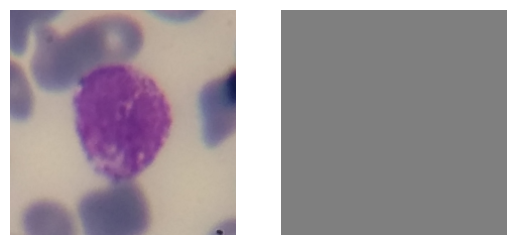

<Figure size 640x480 with 0 Axes>

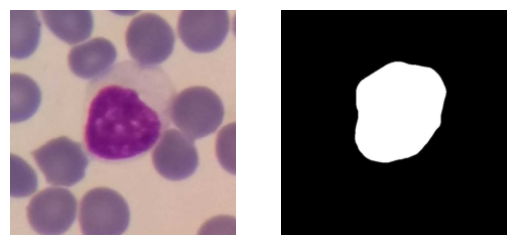

In [15]:
#### Visualise sample training data for report purpose ####
def show_wbc_sample():
    classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    dataset, data_loader = generate_data('wbc_1', classnames)

    # Visualise sample data without mask
    plt.tight_layout()
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(dataset[0][0].permute(1,2,0))
    ax1.axis('off')
    ax2.imshow(dataset[0][1].permute(1,2,0))
    ax2.axis('off')
    plt.show()

    # Visualise sample data with mask
    for i in range(len(dataset)):
      if torch.mean(dataset[i][1]).item() == 0.5:
        continue
      plt.tight_layout()
      fig, (ax1, ax2) = plt.subplots(1,2)
      ax1.imshow(dataset[i][0].permute(1,2,0))
      ax1.axis('off')
      ax2.imshow(dataset[i][1].permute(1,2,0))
      ax2.axis('off')
      plt.show()
      break

show_wbc_sample()

A.2 Create neural network based on resnet50 architecture for training WBC datasets without pre-trained parameters

In [16]:
# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

In [17]:
# Create custom neural network class for image classification with initial resnet50 and attention mechanism

class Net(nn.Module):
    def __init__(self, pretrained_model, num_classes):
        super(Net, self).__init__()
        self.Net = pretrained_model
        # Change final prediction fully connected layer from imagnet 1000 classes to target classes
        self.Net.fc = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(p=0.25),  # Add dropout here to reduce overfitting
            nn.Linear(512, num_classes)
        )

        # Generate attention filters their output will be multiplied with the main net feature map
        self.Attentionlayer = nn.Conv2d(1, 64, stride=1, kernel_size=3, padding=1, bias=True)
        self.Attentionlayer.bias.data = torch.ones(self.Attentionlayer.bias.data.shape)
        self.Attentionlayer.weight.data = torch.zeros(self.Attentionlayer.weight.data.shape)

    def forward(self,images,ROI):
        input_images = images.to(device)
        input_ROI = ROI.to(device)

        # Run net layers
        x = input_images
        x = self.Net.conv1(x) #First resnet conv layer

        # Apply Attention Layers
        AttentionMap = self.Attentionlayer(F.interpolate(input_ROI, size=x.shape[2:4], mode='bilinear'))
        x = x + AttentionMap

        # First resnet block
        x = self.Net.bn1(x)
        x = self.Net.relu(x)
        x = self.Net.maxpool(x)
        x = self.Net.layer1(x)

        # Subsequent resnet blocks
        x = self.Net.layer2(x)
        x = self.Net.layer3(x)
        x = self.Net.layer4(x)

        # Apply connected final vector
        x = torch.mean(torch.mean(x, dim=2), dim=2)
        x = self.Net.fc(x)

        ProbVec = F.softmax(x, dim=1) # Probability vector for all classes
        Prob,Pred = ProbVec.max(dim=1) #Top predicted class and probability

        return ProbVec, Pred


In [18]:
#### Visualise neural network summary for WBC training for report purpose ####
def show_model_summary():
    # classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    classnames = ['normal', 'tumor']
    pretrained_model = models.resnet50(pretrained=False)
    model = Net(pretrained_model, len(classnames))
    model.to(device)
    print(summary(model, input_size=[(3,224,224),(1,224,224)]))
# show_model_summary()

In [19]:
#### Investigate the trainable parameters ####
def show_model_params():
    classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    pretrained_model = models.resnet50(pretrained=False)
    model = Net(pretrained_model, len(classnames))
    model.to(device)
    for name,param in model.named_parameters():
      print(name, 'requires_grad=', param.requires_grad)
show_model_params()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Net.conv1.weight requires_grad= True
Net.bn1.weight requires_grad= True
Net.bn1.bias requires_grad= True
Net.layer1.0.conv1.weight requires_grad= True
Net.layer1.0.bn1.weight requires_grad= True
Net.layer1.0.bn1.bias requires_grad= True
Net.layer1.0.conv2.weight requires_grad= True
Net.layer1.0.bn2.weight requires_grad= True
Net.layer1.0.bn2.bias requires_grad= True
Net.layer1.0.conv3.weight requires_grad= True
Net.layer1.0.bn3.weight requires_grad= True
Net.layer1.0.bn3.bias requires_grad= True
Net.layer1.0.downsample.0.weight requires_grad= True
Net.layer1.0.downsample.1.weight requires_grad= True
Net.layer1.0.downsample.1.bias requires_grad= True
Net.layer1.1.conv1.weight requires_grad= True
Net.layer1.1.bn1.weight requires_grad= True
Net.layer1.1.bn1.bias requires_grad= True
Net.layer1.1.conv2.weight requires_grad= True
Net.layer1.1.bn2.weight requires_grad= True
Net.layer1.1.bn2.bias requires_grad= True
Net.layer1.1.conv3.weight requires_grad= True
Net.layer1.1.bn3.weight requires

A.3 Training Resnet Model

Where validation set is given, 'early-stopping' is implemented when validation accuracy decrease

In [35]:
def train_model(modelname, foldername, classnames, custom_net, pretrained_model = None, validation = False):
  print(f'Training {foldername} ...')

  # Specify training parameters
  learning_rate=1e-5
  weight_decay=1e-5
  start_itr=0
  max_itr = int(15)

  dataset, data_loader = generate_data(foldername, classnames)

  if validation:
    val_set, val_loader = generate_data(foldername, classnames, mode='val')

  num_classes = len(classnames)
  if pretrained_model:
      model = custom_net(pretrained_model, num_classes)
  else:
      model = custom_net(num_classes)
  model.to(device)

  optimizer=torch.optim.AdamW(params=model.parameters(),lr=learning_rate,weight_decay=weight_decay)

  accuracy_list = []
  loss_list = []
  val_accuracy_list = []
  val_loss_list = []

  for itr in range(start_itr,max_itr):

      model.train()

      train_correct = 0
      AVGLoss = []

      for batch in data_loader:
          OneHotLabels = torch.transpose(torch.stack(batch[-1]), 0, 1).to(dtype=torch.float)
          OneHotLabels.requires_grad = False
          Images = batch[0] # (batch, channel=3, H, W)
          Images.requires_grad = True
          SegmentMasks = torch.unsqueeze(batch[1][:,0,:,:], dim=1) # (batch, channel=1, H, W)
          SegmentMasks.requires_grad = True

          if torch.cuda.is_available():
            OneHotLabels = OneHotLabels.to('cuda')
            Images = Images.to('cuda')
            SegmentMasks = SegmentMasks.to('cuda')

          Prob, Lb = model.forward(Images,SegmentMasks) # Run net inference and get prediction

          model.zero_grad()

          Loss = -torch.mean((OneHotLabels * torch.log(Prob + 0.0000001)))  # Calculate cross entropy loss

          Loss.backward()
          optimizer.step()

          train_correct += (Lb == OneHotLabels.max(dim=1)[1]).sum().item() # Calculate accuracy

          AVGLoss.append(float(Loss.data.cpu().numpy())) #Calculate average loss for display

      # Calculate training metrics (accuracy, average loss)
      train_accuracy = train_correct / len(dataset) * 100

      accuracy_list.append(train_accuracy)
      loss_list.append(np.mean(AVGLoss))

      print(f'On training, Epoch [{itr + 1}/{max_itr}], Loss: {np.mean(AVGLoss):.4f}, Accuracy: {train_accuracy:.1f}%')

      if not validation:
          torch.save(model, f'{modelname}.pth')
          continue

      # Validation loop
      model.eval()
      with torch.no_grad():
          val_loss = []
          val_correct = 0

          for batch in val_loader:
              OneHotLabels = torch.transpose(torch.stack(batch[-1]), 0, 1).to(dtype=torch.float)
              Images = batch[0] # (batch, channel=3, H, W)
              SegmentMasks = torch.unsqueeze(batch[1][:,0,:,:], dim=1) # (batch, channel=1, H, W)
              if torch.cuda.is_available():
                OneHotLabels = OneHotLabels.to('cuda')
                Images = Images.to('cuda')
                SegmentMasks = SegmentMasks.to('cuda')

              Prob, Lb = model.forward(Images,SegmentMasks)

              Loss = -torch.mean((OneHotLabels * torch.log(Prob + 0.0000001)))  # Calculate cross entropy loss
              val_loss.append(float(Loss.data.cpu().numpy())) #Calculate average loss for display
              val_correct += (Lb == OneHotLabels.max(dim=1)[1]).sum().item() # Calculate accuracy

          # Calculate validation metrics (accuracy, average loss)
          val_accuracy = val_correct / len(val_set) * 100

          val_accuracy_list.append(val_accuracy)
          val_loss_list.append(np.mean(val_loss))

          print(f'On validation, Epoch [{itr + 1}/{max_itr}], Loss: {np.mean(val_loss):.4f}, Accuracy: {val_accuracy:.1f}%')

      # Implement early stopping
      if itr > 5 and val_accuracy < val_accuracy_list[-2]:
          break

      torch.save(model, f'{modelname}.pth')

  return {'training_accuracies':accuracy_list,
          'training_losses':loss_list,
          'validation_accuracies':val_accuracy_list,
          'validation_losses':val_loss_list }

Train WBC datasets without transfer learning. Resnet50 architecture is used in the initial network layers without the pre-trained parameters.

Trained models are saved as:

*   wbc_1.pth
*   wbc_10.pth
*   wbc_50.pth
*   wbc_100.pth


In [19]:
# Define classnames and resnet architecture used for training WBC datasets without additional info
wbc_classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']

In [22]:
# Train WBC1 without additional info - wbc_1.pth
resnet50 = models.resnet50(pretrained=False)
wbc_1_output_dict = train_model('wbc_1','wbc_1', wbc_classnames, Net, pretrained_model=resnet50)

Training wbc_1 ...
Generated dataset of size 82
On training, Epoch [1/15], Loss: 0.3027, Accuracy: 42.7%
On training, Epoch [2/15], Loss: 0.2598, Accuracy: 62.2%
On training, Epoch [3/15], Loss: 0.2242, Accuracy: 62.2%
On training, Epoch [4/15], Loss: 0.1930, Accuracy: 62.2%
On training, Epoch [5/15], Loss: 0.2370, Accuracy: 62.2%
On training, Epoch [6/15], Loss: 0.1808, Accuracy: 62.2%
On training, Epoch [7/15], Loss: 0.2060, Accuracy: 62.2%
On training, Epoch [8/15], Loss: 0.2308, Accuracy: 62.2%
On training, Epoch [9/15], Loss: 0.1969, Accuracy: 62.2%
On training, Epoch [10/15], Loss: 0.1815, Accuracy: 63.4%
On training, Epoch [11/15], Loss: 0.2129, Accuracy: 63.4%
On training, Epoch [12/15], Loss: 0.1826, Accuracy: 65.9%
On training, Epoch [13/15], Loss: 0.2008, Accuracy: 61.0%
On training, Epoch [14/15], Loss: 0.2312, Accuracy: 64.6%
On training, Epoch [15/15], Loss: 0.1756, Accuracy: 61.0%


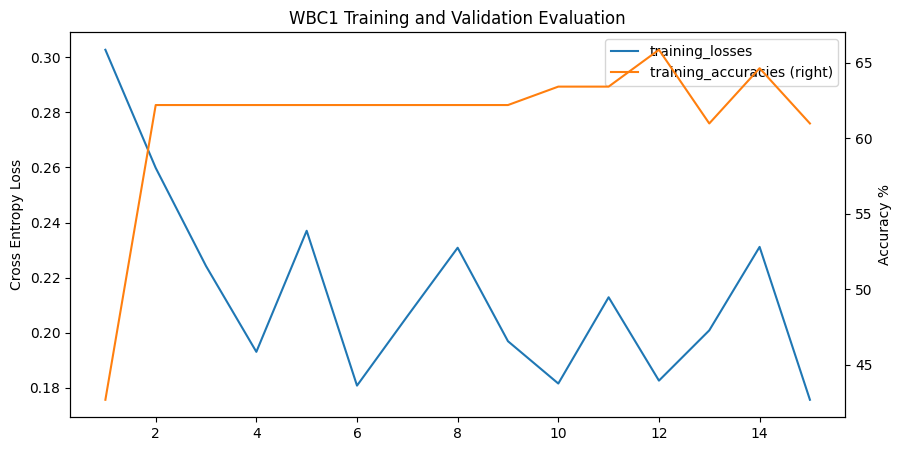

In [23]:
#### Plot training loss and accuracies ####
wbc_1_output_dict.popitem() # remove validation accuracy
wbc_1_output_dict.popitem() # remove validation loss
wbc_1_df = pd.DataFrame(wbc_1_output_dict)
wbc_1_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_1_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
wbc_1_df.plot(y='training_accuracies', ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC1 Training and Validation Evaluation')
plt.show()

In [24]:
# Train WBC10 without additional info - wbc_10.pth
resnet50 = models.resnet50(pretrained=False)
wbc_10_output_dict = train_model('wbc_10','wbc_10', wbc_classnames, Net, pretrained_model=resnet50)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training wbc_10 ...
Generated dataset of size 842
On training, Epoch [1/15], Loss: 0.2349, Accuracy: 56.4%
On training, Epoch [2/15], Loss: 0.2099, Accuracy: 61.4%
On training, Epoch [3/15], Loss: 0.2097, Accuracy: 61.4%
On training, Epoch [4/15], Loss: 0.2059, Accuracy: 61.4%
On training, Epoch [5/15], Loss: 0.2028, Accuracy: 61.4%
On training, Epoch [6/15], Loss: 0.1983, Accuracy: 61.6%
On training, Epoch [7/15], Loss: 0.1947, Accuracy: 62.0%
On training, Epoch [8/15], Loss: 0.1928, Accuracy: 61.3%
On training, Epoch [9/15], Loss: 0.1846, Accuracy: 62.1%
On training, Epoch [10/15], Loss: 0.1774, Accuracy: 63.3%
On training, Epoch [11/15], Loss: 0.1635, Accuracy: 65.6%
On training, Epoch [12/15], Loss: 0.1441, Accuracy: 71.5%
On training, Epoch [13/15], Loss: 0.1280, Accuracy: 77.4%
On training, Epoch [14/15], Loss: 0.1127, Accuracy: 80.5%
On training, Epoch [15/15], Loss: 0.1015, Accuracy: 81.2%


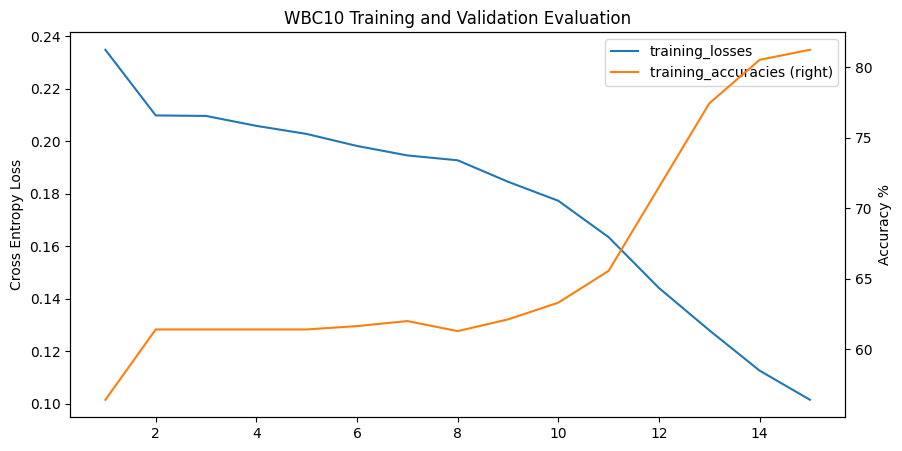

In [25]:
#### Plot training loss and accuracies ####
wbc_10_output_dict.popitem() # remove validation accuracy
wbc_10_output_dict.popitem() # remove validation loss
wbc_10_df = pd.DataFrame(wbc_10_output_dict)
wbc_10_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_10_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
wbc_10_df.plot(y='training_accuracies', ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC10 Training and Validation Evaluation')
plt.show()

In [26]:
# Train WBC50 without additional info - wbc_50.pth
resnet50 = models.resnet50(pretrained=False)
wbc_50_output_dict = train_model('wbc_50','wbc_50', wbc_classnames, Net, pretrained_model=resnet50)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training wbc_50 ...
Generated dataset of size 4223
On training, Epoch [1/15], Loss: 0.2196, Accuracy: 60.3%
On training, Epoch [2/15], Loss: 0.2000, Accuracy: 61.5%
On training, Epoch [3/15], Loss: 0.1505, Accuracy: 71.6%
On training, Epoch [4/15], Loss: 0.0983, Accuracy: 81.9%
On training, Epoch [5/15], Loss: 0.0804, Accuracy: 84.8%
On training, Epoch [6/15], Loss: 0.0675, Accuracy: 87.2%
On training, Epoch [7/15], Loss: 0.0602, Accuracy: 88.4%
On training, Epoch [8/15], Loss: 0.0512, Accuracy: 90.1%
On training, Epoch [9/15], Loss: 0.0439, Accuracy: 91.9%
On training, Epoch [10/15], Loss: 0.0395, Accuracy: 92.5%
On training, Epoch [11/15], Loss: 0.0358, Accuracy: 93.4%
On training, Epoch [12/15], Loss: 0.0328, Accuracy: 94.1%
On training, Epoch [13/15], Loss: 0.0278, Accuracy: 95.1%
On training, Epoch [14/15], Loss: 0.0228, Accuracy: 96.0%
On training, Epoch [15/15], Loss: 0.0216, Accuracy: 96.3%


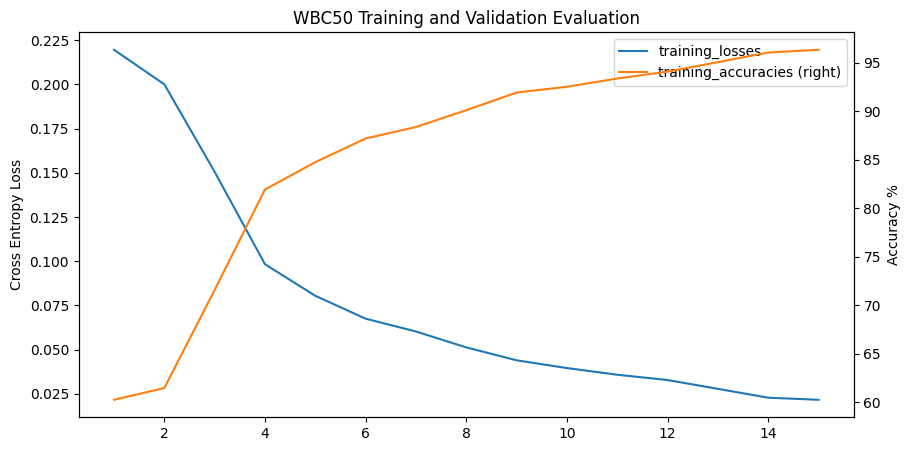

In [27]:
#### Plot training loss and accuracies ####
wbc_50_output_dict.popitem() # remove validation accuracy
wbc_50_output_dict.popitem() # remove validation loss
wbc_50_df = pd.DataFrame(wbc_50_output_dict)
wbc_50_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_50_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
wbc_50_df.plot(y='training_accuracies', ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC50 Training and Validation Evaluation')
plt.show()

In [28]:
# Train WBC100 without additional info - wbc_100.pth
resnet50 = models.resnet50(pretrained=False)
wbc_100_output_dict = train_model('wbc_100','wbc_100', wbc_classnames, Net, pretrained_model=resnet50, validation=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training wbc_100 ...
Generated dataset of size 8447
Generated dataset of size 1728
On training, Epoch [1/15], Loss: 0.2068, Accuracy: 62.0%
On validation, Epoch [1/15], Loss: 0.1655, Accuracy: 69.3%
On training, Epoch [2/15], Loss: 0.1189, Accuracy: 79.2%
On validation, Epoch [2/15], Loss: 0.0663, Accuracy: 88.9%
On training, Epoch [3/15], Loss: 0.0704, Accuracy: 87.1%
On validation, Epoch [3/15], Loss: 0.0500, Accuracy: 91.7%
On training, Epoch [4/15], Loss: 0.0572, Accuracy: 89.8%
On validation, Epoch [4/15], Loss: 0.0518, Accuracy: 91.7%
On training, Epoch [5/15], Loss: 0.0455, Accuracy: 92.3%
On validation, Epoch [5/15], Loss: 0.0388, Accuracy: 94.0%
On training, Epoch [6/15], Loss: 0.0404, Accuracy: 92.7%
On validation, Epoch [6/15], Loss: 0.0365, Accuracy: 93.8%
On training, Epoch [7/15], Loss: 0.0347, Accuracy: 93.9%
On validation, Epoch [7/15], Loss: 0.0338, Accuracy: 94.9%
On training, Epoch [8/15], Loss: 0.0301, Accuracy: 94.9%
On validation, Epoch [8/15], Loss: 0.0293, Accur

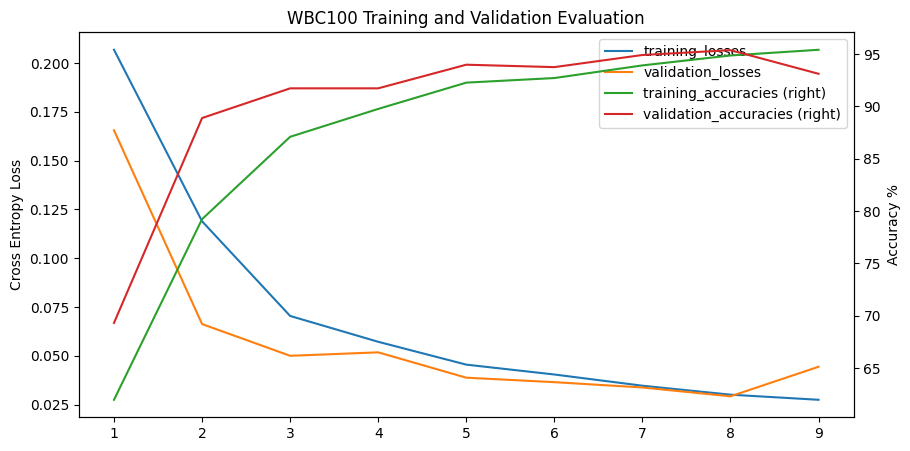

In [29]:
#### Plot training loss and accuracies ####
wbc_100_df = pd.DataFrame(wbc_100_output_dict)
wbc_100_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_100_df.plot(y=['training_losses','validation_losses'], ax=ax, ylabel = 'Cross Entropy Loss')
wbc_100_df.plot(y=['training_accuracies','validation_accuracies'], ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC100 Training and Validation Evaluation')
plt.show()

B. Training with additional information

B.1 Train CAM16 dataset

In [30]:
# Train CAM16 on resnet50 architecture
classnames_CAM16 = ['normal','tumor']
pretrained_model = models.resnet50(pretrained=False)

cam16_output_dict = train_model('cam16', 'CAM16', classnames_CAM16, Net, pretrained_model=resnet50, validation=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training CAM16 ...
Generated dataset of size 757
Generated dataset of size 108
On training, Epoch [1/15], Loss: 0.2846, Accuracy: 70.5%
On validation, Epoch [1/15], Loss: 0.2181, Accuracy: 83.3%
On training, Epoch [2/15], Loss: 0.2147, Accuracy: 81.6%
On validation, Epoch [2/15], Loss: 0.2113, Accuracy: 82.4%
On training, Epoch [3/15], Loss: 0.1885, Accuracy: 83.8%
On validation, Epoch [3/15], Loss: 0.2075, Accuracy: 83.3%
On training, Epoch [4/15], Loss: 0.1812, Accuracy: 83.5%
On validation, Epoch [4/15], Loss: 0.2218, Accuracy: 76.9%
On training, Epoch [5/15], Loss: 0.1669, Accuracy: 86.4%
On validation, Epoch [5/15], Loss: 0.2138, Accuracy: 84.3%
On training, Epoch [6/15], Loss: 0.1645, Accuracy: 86.3%
On validation, Epoch [6/15], Loss: 0.1952, Accuracy: 85.2%
On training, Epoch [7/15], Loss: 0.1411, Accuracy: 88.6%
On validation, Epoch [7/15], Loss: 0.1881, Accuracy: 84.3%


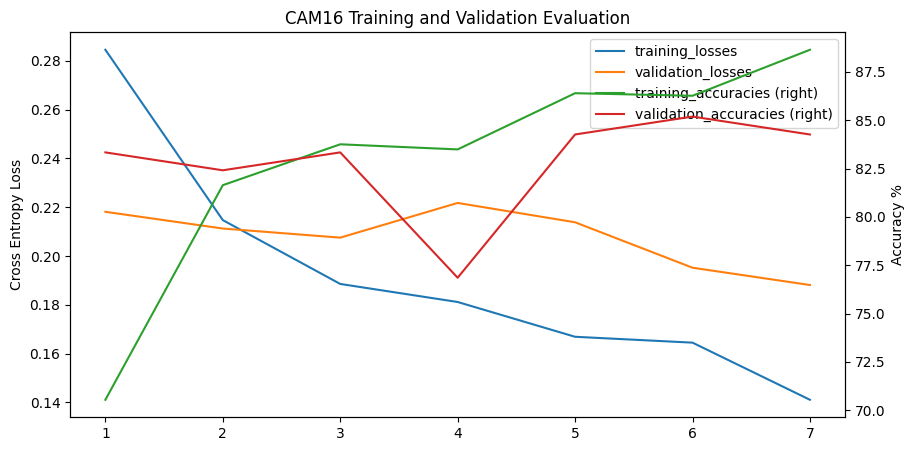

In [31]:
#### Plot training loss and accuracies ####
cam16_df = pd.DataFrame(cam16_output_dict)
cam16_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
cam16_df.plot(y=['training_losses','validation_losses'], ax=ax, ylabel = 'Cross Entropy Loss')
cam16_df.plot(y=['training_accuracies','validation_accuracies'], ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('CAM16 Training and Validation Evaluation')
plt.show()

In [20]:
#  Build CAM16-based neural net with attention mask directed classification
class CustomNet(nn.Module):
    def __init__(self, pretrained_model, num_classes):
        super(CustomNet, self).__init__()
        self.pretrained_model = pretrained_model
        # Change final prediction fully connected layer from imagnet 1000 classes to target classes
        self.pretrained_model.Net.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(p=0.25),  # Add dropout here to reduce overfitting
            nn.Linear(256, num_classes)
        )


    def forward(self,Images,ROI):
        InpImages = Images.to(device)
        ROImap = ROI.to(device)

        # Run net layers
        x = InpImages
        x = self.pretrained_model.Net.conv1(x) #First resnet conv layer

        # Apply Attention Layers
        AttentionMap = self.pretrained_model.Attentionlayer(F.interpolate(ROImap, size=x.shape[2:4], mode='bilinear'))
        x = x + AttentionMap

        # First resnet block
        x = self.pretrained_model.Net.bn1(x)
        x = self.pretrained_model.Net.relu(x)
        x = self.pretrained_model.Net.maxpool(x)
        x = self.pretrained_model.Net.layer1(x)

        # Subsequent resnet blocks
        x = self.pretrained_model.Net.layer2(x)
        x = self.pretrained_model.Net.layer3(x)
        x = self.pretrained_model.Net.layer4(x)

        # Apply connected final vector
        x = torch.mean(torch.mean(x, dim=2), dim=2)
        x = self.pretrained_model.Net.fc(x)

        ProbVec = F.softmax(x, dim=1) # Probability vector for all classes
        Prob,Pred = ProbVec.max(dim=1) #Top predicted class and probability

        return ProbVec, Pred


In [21]:
#### Set up pre-trained models considering whether to freeze initial layers for transfer learning ####
def load_pretrained(filename, freeze_layers=True):
    model = torch.load(filename)
    model = model.to(device)
    for name, param in model.named_parameters():
        if 'Attention' not in name:
            param.requires_grad = False

    return model

In [34]:
#### Investigate the trainable parameters in CustomNet and ensure that fc and AttentionLayers are trainable ####
def show_model_params():
    classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    cam16 = load_pretrained('cam16.pth', freeze_layers=True)
    model = CustomNet(cam16, len(classnames)) # Freeze all layers except fc and AttentionLayer
    model.to(device)
    for name,param in model.named_parameters():
      print(name, 'requires_grad=', param.requires_grad)
show_model_params()

pretrained_model.Net.conv1.weight requires_grad= False
pretrained_model.Net.bn1.weight requires_grad= False
pretrained_model.Net.bn1.bias requires_grad= False
pretrained_model.Net.layer1.0.conv1.weight requires_grad= False
pretrained_model.Net.layer1.0.bn1.weight requires_grad= False
pretrained_model.Net.layer1.0.bn1.bias requires_grad= False
pretrained_model.Net.layer1.0.conv2.weight requires_grad= False
pretrained_model.Net.layer1.0.bn2.weight requires_grad= False
pretrained_model.Net.layer1.0.bn2.bias requires_grad= False
pretrained_model.Net.layer1.0.conv3.weight requires_grad= False
pretrained_model.Net.layer1.0.bn3.weight requires_grad= False
pretrained_model.Net.layer1.0.bn3.bias requires_grad= False
pretrained_model.Net.layer1.0.downsample.0.weight requires_grad= False
pretrained_model.Net.layer1.0.downsample.1.weight requires_grad= False
pretrained_model.Net.layer1.0.downsample.1.bias requires_grad= False
pretrained_model.Net.layer1.1.conv1.weight requires_grad= False
pretrain

In [35]:
#### Visualise the layers within cam16 model ####
cam16 = torch.load("cam16.pth")
cam16 = cam16.to(device)

# summary(cam16, input_size=[(3,224,224),(1,224,224)])

In [36]:
# Load the pre-trained cam16 model
cam16 = load_pretrained("cam16.pth", freeze_layers=True)
wbc100_cam16_output_dict = train_model('wbc_100_cam16','wbc_100', wbc_classnames, custom_net = CustomNet, pretrained_model=cam16, validation=True)

Training wbc_100 ...
Generated dataset of size 8447
Generated dataset of size 1728
On training, Epoch [1/15], Loss: 0.1114, Accuracy: 81.7%
On validation, Epoch [1/15], Loss: 0.0638, Accuracy: 90.2%
On training, Epoch [2/15], Loss: 0.0617, Accuracy: 90.3%
On validation, Epoch [2/15], Loss: 0.0490, Accuracy: 93.5%
On training, Epoch [3/15], Loss: 0.0520, Accuracy: 92.0%
On validation, Epoch [3/15], Loss: 0.0421, Accuracy: 94.1%
On training, Epoch [4/15], Loss: 0.0480, Accuracy: 92.4%
On validation, Epoch [4/15], Loss: 0.0403, Accuracy: 93.8%
On training, Epoch [5/15], Loss: 0.0435, Accuracy: 93.1%
On validation, Epoch [5/15], Loss: 0.0365, Accuracy: 94.6%
On training, Epoch [6/15], Loss: 0.0416, Accuracy: 93.1%
On validation, Epoch [6/15], Loss: 0.0363, Accuracy: 94.6%
On training, Epoch [7/15], Loss: 0.0421, Accuracy: 93.0%
On validation, Epoch [7/15], Loss: 0.0361, Accuracy: 95.0%
On training, Epoch [8/15], Loss: 0.0392, Accuracy: 93.5%
On validation, Epoch [8/15], Loss: 0.0343, Accur

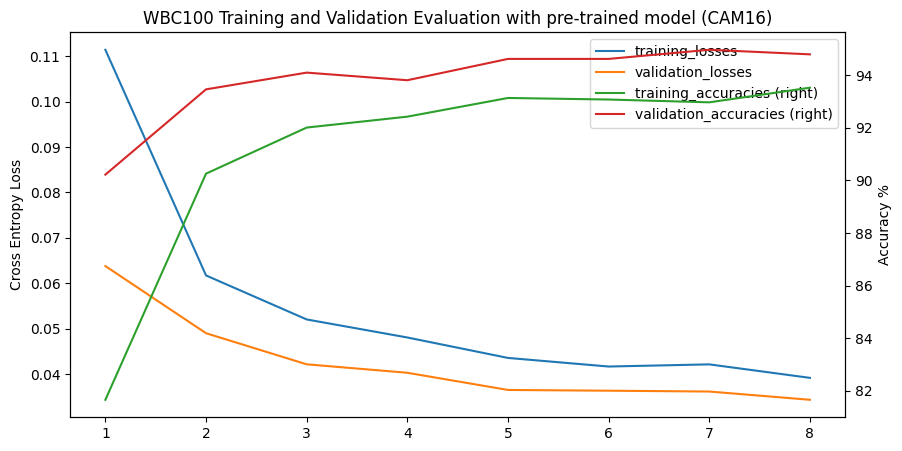

In [37]:
#### Plot training loss and accuracies ####
wbc_100_cam16_df = pd.DataFrame(wbc100_cam16_output_dict)
wbc_100_cam16_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_100_cam16_df.plot(y=['training_losses','validation_losses'], ax=ax, ylabel = 'Cross Entropy Loss')
wbc_100_cam16_df.plot(y=['training_accuracies','validation_accuracies'], ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC100 Training and Validation Evaluation with pre-trained model (CAM16)')
plt.show()

B.2 Train pRCC dataset

In [22]:
# Create encoder
def create_encoder(hidden_dim):
    encoder = models.resnet50(pretrained=False)
    encoder.fc = nn.Linear(2048, hidden_dim, bias=True)
    encoder = encoder.to(device)
    return encoder

# summary(create_encoder(), (3,224,224))


In [23]:
class Decoder(nn.Module):
    def __init__(self, hidden_dim, batch_size):
        super(Decoder,self).__init__()
        self.batch_size = batch_size
        self.dfc3 = nn.Linear(hidden_dim, 4096)
        self.bn3 = nn.BatchNorm1d(4096)
        self.dfc2 = nn.Linear(4096, 4096)
        self.bn2 = nn.BatchNorm1d(4096)
        self.dfc1 = nn.Linear(4096,256 * 6 * 6)
        self.bn1 = nn.BatchNorm1d(256*6*6)
        self.upsample1=nn.Upsample(scale_factor=2)
        self.dconv5 = nn.ConvTranspose2d(256, 256, 3, padding = 0)
        self.dconv4 = nn.ConvTranspose2d(256, 384, 3, padding = 1)
        self.dconv3 = nn.ConvTranspose2d(384, 192, 3, padding = 1)
        self.dconv2 = nn.ConvTranspose2d(192, 64, 5, padding = 2)
        self.dconv1 = nn.ConvTranspose2d(64, 3, 12, stride = 4, padding = 4)

    def forward(self,x):#,i1,i2,i3):

        x = self.dfc3(x)
        x = F.relu(self.bn3(x))
        x = self.dfc2(x)
        x = F.relu(self.bn2(x))
        x = self.dfc1(x)
        x = F.relu(self.bn1(x))
        x = x.view(self.batch_size,256,6,6)
        x=self.upsample1(x)
        x = self.dconv5(x)
        x = F.relu(x)
        x = F.relu(self.dconv4(x))
        x = F.relu(self.dconv3(x))
        x=self.upsample1(x)
        x = self.dconv2(x)
        x = F.relu(x)
        x=self.upsample1(x)
        x = self.dconv1(x)
        x = F.sigmoid(x)

        return x

In [40]:
#### Visualise the layers within decoder ####

def show_model_summary(hidden_dim=256, batch_size=2):
    decoder = Decoder(hidden_dim, batch_size)
    decoder = decoder.to(device)
    print(summary(decoder, (hidden_dim,)))
show_model_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 4096]         135,168
       BatchNorm1d-2                 [-1, 4096]           8,192
            Linear-3                 [-1, 4096]      16,781,312
       BatchNorm1d-4                 [-1, 4096]           8,192
            Linear-5                 [-1, 9216]      37,757,952
       BatchNorm1d-6                 [-1, 9216]          18,432
          Upsample-7          [-1, 256, 12, 12]               0
   ConvTranspose2d-8          [-1, 256, 14, 14]         590,080
   ConvTranspose2d-9          [-1, 384, 14, 14]         885,120
  ConvTranspose2d-10          [-1, 192, 14, 14]         663,744
         Upsample-11          [-1, 192, 28, 28]               0
  ConvTranspose2d-12           [-1, 64, 28, 28]         307,264
         Upsample-13           [-1, 64, 56, 56]               0
  ConvTranspose2d-14          [-1, 3, 2

In [24]:
class Autoencoder(nn.Module):
    def __init__(self, hidden_dim, batch_size):
        super(Autoencoder,self).__init__()
        self.encoder = create_encoder(hidden_dim)
        self.decoder = Decoder(hidden_dim, batch_size)

    def forward(self,x):
        x = self.encoder(x)
        x = F.relu(x)
        x = self.decoder(x)
        return x

In [42]:
#### Visualise the layers within autoencoder ####

def show_model_summary(hidden_dim=256, batch_size=2):
    autoencoder = Autoencoder(hidden_dim, batch_size)
    autoencoder = autoencoder.to(device)
    print(summary(autoencoder, (3,224,224)))
# show_model_summary()

In [25]:
# Create a custom dataset that includes images and sample masks
class pRCCDataset(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.total_imgs = os.listdir(main_dir)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc)
        tensor_image = self.transform(image)
        return tensor_image

In [26]:
def train_pRCC(hidden_dim, batch_size, epochs, learning_rate=1e-5):

      # Generate dataset
      transform = transforms.Compose([transforms.Resize([224, 224]),
                                transforms.ToTensor()])
      pRCC_dataset = pRCCDataset('pRCC/', transform=transform)
      pRCC_loader = torch.utils.data.DataLoader(dataset=pRCC_dataset,
                                                batch_size=batch_size, # batch_size has to be equal throughout, i.e. 11
                                                shuffle=True)

      model = Autoencoder(hidden_dim, batch_size).to(device)

      model_params = list(model.parameters())
      optimizer = torch.optim.Adam(model_params, lr=learning_rate)
      loss_function = nn.MSELoss()

      epoch_train_losses = []

      for epoch in range(epochs):
          model.train()
          losses=[]

          for image in pRCC_loader:
              image.requires_grad = True
              image = image.to(device)

              optimizer.zero_grad()
              reconstructed = model(image)
              loss = loss_function(reconstructed, image)

              loss.backward()
              optimizer.step()

              losses.append(loss.item())

          epoch_loss = np.mean(losses)
          print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}')

          # Storing the losses in a list for plotting
          epoch_train_losses.append(epoch_loss)

      torch.save(model, f'pRCC.pth')
      torch.save(model.encoder, f'pRCC_encoder.pth')

      return epoch_train_losses


In [45]:
pRCC_training_losses = train_pRCC(hidden_dim=256, batch_size=11, epochs=5, learning_rate=1e-5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/5], Loss: 0.0457
Epoch [2/5], Loss: 0.0382
Epoch [3/5], Loss: 0.0360
Epoch [4/5], Loss: 0.0350
Epoch [5/5], Loss: 0.0341


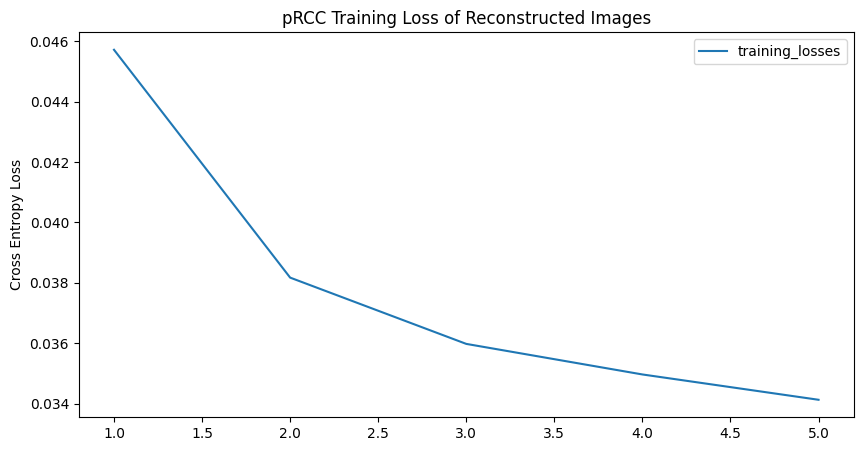

In [46]:
#### Plot training loss and accuracies ####
pRCC_df = pd.DataFrame({'training_losses': pRCC_training_losses})
pRCC_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
pRCC_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
plt.title('pRCC Training Loss of Reconstructed Images')
plt.show()

In [47]:
# Load the pre-trained pRCC_encoder model
pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
wbc100_pRCC_output_dict = train_model('wbc_100_pRCC','wbc_100', wbc_classnames, custom_net = Net, pretrained_model=pRCC_encoder, validation=True)

Training wbc_100 ...
Generated dataset of size 8447
Generated dataset of size 1728
On training, Epoch [1/15], Loss: 0.2180, Accuracy: 60.5%
On validation, Epoch [1/15], Loss: 0.2144, Accuracy: 61.3%
On training, Epoch [2/15], Loss: 0.2139, Accuracy: 61.2%
On validation, Epoch [2/15], Loss: 0.2145, Accuracy: 61.3%
On training, Epoch [3/15], Loss: 0.2129, Accuracy: 61.2%
On validation, Epoch [3/15], Loss: 0.2140, Accuracy: 61.3%
On training, Epoch [4/15], Loss: 0.2121, Accuracy: 61.2%
On validation, Epoch [4/15], Loss: 0.2137, Accuracy: 61.3%
On training, Epoch [5/15], Loss: 0.2123, Accuracy: 61.2%
On validation, Epoch [5/15], Loss: 0.2153, Accuracy: 61.3%
On training, Epoch [6/15], Loss: 0.2116, Accuracy: 61.2%
On validation, Epoch [6/15], Loss: 0.2128, Accuracy: 61.3%
On training, Epoch [7/15], Loss: 0.2109, Accuracy: 61.2%
On validation, Epoch [7/15], Loss: 0.2137, Accuracy: 61.3%
On training, Epoch [8/15], Loss: 0.2110, Accuracy: 61.2%
On validation, Epoch [8/15], Loss: 0.2145, Accur

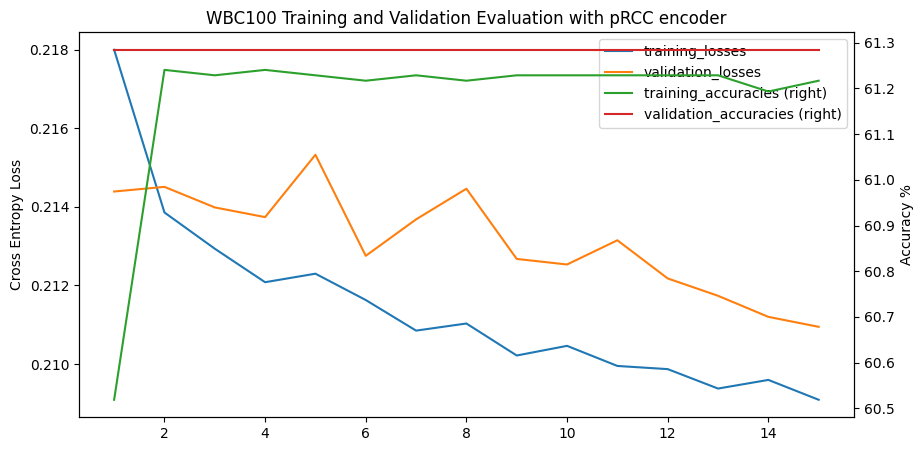

In [48]:
#### Plot training loss and accuracies ####
wbc_100_pRCC_df = pd.DataFrame(wbc100_pRCC_output_dict)
wbc_100_pRCC_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_100_pRCC_df.plot(y=['training_losses','validation_losses'], ax=ax, ylabel = 'Cross Entropy Loss')
wbc_100_pRCC_df.plot(y=['training_accuracies','validation_accuracies'], ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC100 Training and Validation Evaluation with pRCC encoder')
plt.show()

B.3 Train with CAM16 and pRCC combined dataset

In [27]:
#  Build CAM16-based neural net with pRCC encoder as feature extraction layer with attention mask directed classification
class CombinedNet(nn.Module):
    def __init__(self, num_classes):
        super(CombinedNet, self).__init__()
        self.pretrained_model = cam16
        # Change final prediction fully connected layer from imagnet 1000 classes to target classes
        self.pretrained_model.Net.fc = nn.Sequential(
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(p=0.25),  # Add dropout here to reduce overfitting
            nn.Linear(256, num_classes)
        )
        self.FeatureExtraction = pRCC_encoder # Feature extraction layer created from pRCC encoder


    def forward(self,Images,ROI):
        InpImages = Images.to(device)
        ROImap = ROI.to(device)

        # Run net layers
        x = InpImages
        x = self.pretrained_model.Net.conv1(x) #First resnet conv layer

        # Apply Attention Layers
        AttentionMap = self.pretrained_model.Attentionlayer(F.interpolate(ROImap, size=x.shape[2:4], mode='bilinear'))
        x = x + AttentionMap

        # First resnet block
        x = self.pretrained_model.Net.bn1(x)
        x = self.pretrained_model.Net.relu(x)
        x = self.pretrained_model.Net.maxpool(x)
        x = self.pretrained_model.Net.layer1(x)

        # Subsequent resnet blocks
        x = self.pretrained_model.Net.layer2(x)
        x = self.pretrained_model.Net.layer3(x)
        x = self.pretrained_model.Net.layer4(x)


        # Apply connected final vector
        x = torch.mean(torch.mean(x, dim=2), dim=2)
        x = self.pretrained_model.Net.fc[0](x)

        # Apply feature extraction layer from pRCC autoencoder
        FeatureMap = self.FeatureExtraction(InpImages) # hidden_dim = 256
        x = x + FeatureMap

        x = self.pretrained_model.Net.fc[1:](x)

        ProbVec = F.softmax(x, dim=1) # Probability vector for all classes
        Prob,Pred = ProbVec.max(dim=1) #Top predicted class and probability

        return ProbVec, Pred


In [50]:
#### Investigate the trainable parameters in CombinedNet, ####
#### Freeze layers from encoder (feature extraction) and cam16 ####
def show_model_params():
    classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
    cam16 = load_pretrained('cam16.pth', freeze_layers=True)
    model = CombinedNet(len(classnames))
    model.to(device)
    for name,param in model.named_parameters():
      print(name, 'requires_grad=', param.requires_grad)
# show_model_params()

pretrained_model.Net.conv1.weight requires_grad= False
pretrained_model.Net.bn1.weight requires_grad= False
pretrained_model.Net.bn1.bias requires_grad= False
pretrained_model.Net.layer1.0.conv1.weight requires_grad= False
pretrained_model.Net.layer1.0.bn1.weight requires_grad= False
pretrained_model.Net.layer1.0.bn1.bias requires_grad= False
pretrained_model.Net.layer1.0.conv2.weight requires_grad= False
pretrained_model.Net.layer1.0.bn2.weight requires_grad= False
pretrained_model.Net.layer1.0.bn2.bias requires_grad= False
pretrained_model.Net.layer1.0.conv3.weight requires_grad= False
pretrained_model.Net.layer1.0.bn3.weight requires_grad= False
pretrained_model.Net.layer1.0.bn3.bias requires_grad= False
pretrained_model.Net.layer1.0.downsample.0.weight requires_grad= False
pretrained_model.Net.layer1.0.downsample.1.weight requires_grad= False
pretrained_model.Net.layer1.0.downsample.1.bias requires_grad= False
pretrained_model.Net.layer1.1.conv1.weight requires_grad= False
pretrain

In [ ]:
pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
cam16 = load_pretrained('cam16.pth', freeze_layers=True)
def show_model_summary():
    classnames = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']
    model = CombinedNet(len(classnames))
    model.to(device)
    print(summary(model, input_size=[(3,224,224),(1,224,224)]))
show_model_summary()


In [32]:
# Load the pre-trained cam16 and pRCC_encoder model
pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
cam16 = load_pretrained('cam16.pth', freeze_layers=True)
wbc1_combined_output_dict = train_model('wbc_1_combined','wbc_1', wbc_classnames, custom_net = CombinedNet)

Training wbc_1 ...
Generated dataset of size 82
On training, Epoch [1/15], Loss: 0.3253, Accuracy: 18.3%
On training, Epoch [2/15], Loss: 0.2850, Accuracy: 57.3%
On training, Epoch [3/15], Loss: 0.2631, Accuracy: 64.6%
On training, Epoch [4/15], Loss: 0.2403, Accuracy: 64.6%
On training, Epoch [5/15], Loss: 0.2167, Accuracy: 65.9%
On training, Epoch [6/15], Loss: 0.1867, Accuracy: 68.3%
On training, Epoch [7/15], Loss: 0.1937, Accuracy: 68.3%
On training, Epoch [8/15], Loss: 0.1736, Accuracy: 69.5%
On training, Epoch [9/15], Loss: 0.1675, Accuracy: 70.7%
On training, Epoch [10/15], Loss: 0.1856, Accuracy: 73.2%
On training, Epoch [11/15], Loss: 0.1869, Accuracy: 74.4%
On training, Epoch [12/15], Loss: 0.1676, Accuracy: 75.6%
On training, Epoch [13/15], Loss: 0.1507, Accuracy: 79.3%
On training, Epoch [14/15], Loss: 0.1411, Accuracy: 82.9%
On training, Epoch [15/15], Loss: 0.1749, Accuracy: 82.9%


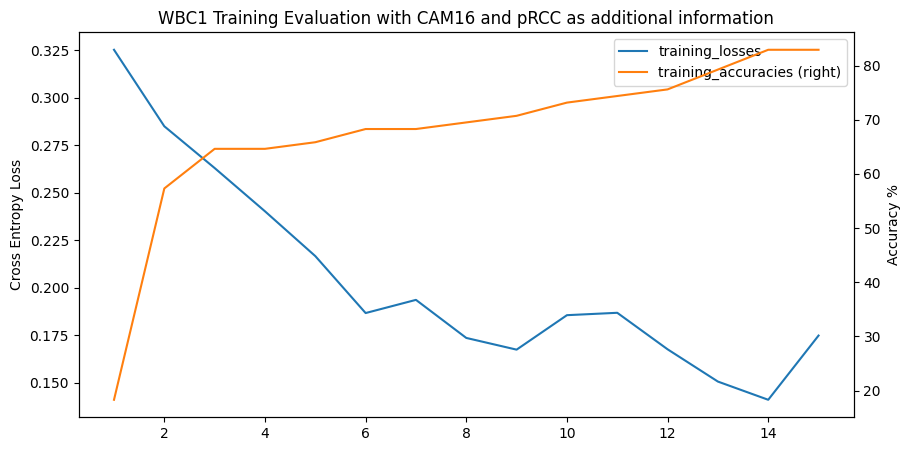

In [33]:
#### Plot training loss and accuracies ####
wbc1_combined_output_dict.popitem() # remove validation accuracy
wbc1_combined_output_dict.popitem() # remove validation loss
wbc_1_combined_df = pd.DataFrame(wbc1_combined_output_dict)
wbc_1_combined_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_1_combined_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
wbc_1_combined_df.plot(y='training_accuracies', ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC1 Training Evaluation with CAM16 and pRCC as additional information')
plt.show()

In [34]:
# Load the pre-trained cam16 and pRCC_encoder model
pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
cam16 = load_pretrained('cam16.pth', freeze_layers=True)
wbc10_combined_output_dict = train_model('wbc_10_combined','wbc_10', wbc_classnames, custom_net = CombinedNet)

Training wbc_10 ...
Generated dataset of size 842
On training, Epoch [1/15], Loss: 0.2449, Accuracy: 55.1%
On training, Epoch [2/15], Loss: 0.1641, Accuracy: 75.1%
On training, Epoch [3/15], Loss: 0.1317, Accuracy: 80.8%
On training, Epoch [4/15], Loss: 0.1159, Accuracy: 81.5%
On training, Epoch [5/15], Loss: 0.1058, Accuracy: 82.8%
On training, Epoch [6/15], Loss: 0.0969, Accuracy: 83.0%
On training, Epoch [7/15], Loss: 0.0888, Accuracy: 85.5%
On training, Epoch [8/15], Loss: 0.0843, Accuracy: 85.3%
On training, Epoch [9/15], Loss: 0.0820, Accuracy: 86.3%
On training, Epoch [10/15], Loss: 0.0727, Accuracy: 88.7%
On training, Epoch [11/15], Loss: 0.0712, Accuracy: 89.3%
On training, Epoch [12/15], Loss: 0.0675, Accuracy: 89.4%
On training, Epoch [13/15], Loss: 0.0721, Accuracy: 88.5%
On training, Epoch [14/15], Loss: 0.0656, Accuracy: 89.8%
On training, Epoch [15/15], Loss: 0.0639, Accuracy: 90.5%


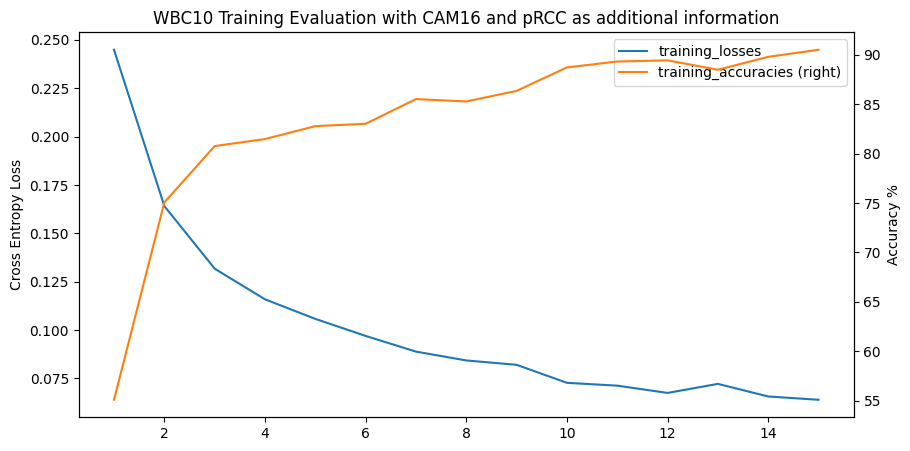

In [37]:
#### Plot training loss and accuracies ####
wbc10_combined_output_dict.popitem() # remove validation accuracy
wbc10_combined_output_dict.popitem() # remove validation loss
wbc_10_combined_df = pd.DataFrame(wbc10_combined_output_dict)
wbc_10_combined_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_10_combined_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
wbc_10_combined_df.plot(y='training_accuracies', ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC10 Training Evaluation with CAM16 and pRCC as additional information')
plt.show()

In [39]:
# Load the pre-trained cam16 and pRCC_encoder model
pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
cam16 = load_pretrained('cam16.pth', freeze_layers=True)
wbc50_combined_output_dict = train_model('wbc_50_combined','wbc_50', wbc_classnames, custom_net = CombinedNet)

Training wbc_50 ...
Generated dataset of size 4223
On training, Epoch [1/15], Loss: 0.1487, Accuracy: 75.9%
On training, Epoch [2/15], Loss: 0.0870, Accuracy: 85.3%
On training, Epoch [3/15], Loss: 0.0695, Accuracy: 88.5%
On training, Epoch [4/15], Loss: 0.0613, Accuracy: 90.6%
On training, Epoch [5/15], Loss: 0.0558, Accuracy: 91.0%
On training, Epoch [6/15], Loss: 0.0481, Accuracy: 93.1%
On training, Epoch [7/15], Loss: 0.0478, Accuracy: 92.3%
On training, Epoch [8/15], Loss: 0.0442, Accuracy: 93.2%
On training, Epoch [9/15], Loss: 0.0435, Accuracy: 92.9%
On training, Epoch [10/15], Loss: 0.0405, Accuracy: 93.7%
On training, Epoch [11/15], Loss: 0.0430, Accuracy: 93.3%
On training, Epoch [12/15], Loss: 0.0381, Accuracy: 93.9%
On training, Epoch [13/15], Loss: 0.0427, Accuracy: 93.2%
On training, Epoch [14/15], Loss: 0.0372, Accuracy: 94.0%
On training, Epoch [15/15], Loss: 0.0376, Accuracy: 93.9%


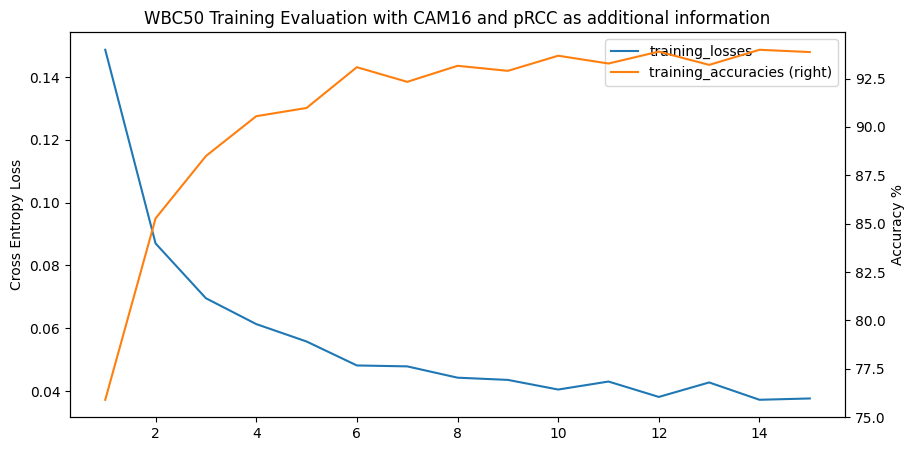

In [41]:
#### Plot training loss and accuracies ####
wbc50_combined_output_dict.popitem() # remove validation accuracy
wbc50_combined_output_dict.popitem() # remove validation loss
wbc_50_combined_df = pd.DataFrame(wbc50_combined_output_dict)
wbc_50_combined_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_50_combined_df.plot(y='training_losses', ax=ax, ylabel = 'Cross Entropy Loss')
wbc_50_combined_df.plot(y='training_accuracies', ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC50 Training Evaluation with CAM16 and pRCC as additional information')
plt.show()

In [42]:
# Load the pre-trained cam16 and pRCC_encoder model
pRCC_encoder = load_pretrained('pRCC_encoder.pth', freeze_layers=True)
cam16 = load_pretrained('cam16.pth', freeze_layers=True)
wbc100_combined_output_dict = train_model('wbc_100_combined','wbc_100', wbc_classnames, custom_net = CombinedNet, pretrained_model=None, validation=True)

Training wbc_100 ...
Generated dataset of size 8447
Generated dataset of size 1728
On training, Epoch [1/15], Loss: 0.1201, Accuracy: 80.5%
On validation, Epoch [1/15], Loss: 0.0670, Accuracy: 89.3%
On training, Epoch [2/15], Loss: 0.0654, Accuracy: 89.8%
On validation, Epoch [2/15], Loss: 0.0505, Accuracy: 93.2%
On training, Epoch [3/15], Loss: 0.0542, Accuracy: 91.5%
On validation, Epoch [3/15], Loss: 0.0443, Accuracy: 93.5%
On training, Epoch [4/15], Loss: 0.0494, Accuracy: 92.0%
On validation, Epoch [4/15], Loss: 0.0398, Accuracy: 93.9%
On training, Epoch [5/15], Loss: 0.0446, Accuracy: 93.2%
On validation, Epoch [5/15], Loss: 0.0386, Accuracy: 94.1%
On training, Epoch [6/15], Loss: 0.0425, Accuracy: 93.1%
On validation, Epoch [6/15], Loss: 0.0359, Accuracy: 95.0%
On training, Epoch [7/15], Loss: 0.0397, Accuracy: 93.7%
On validation, Epoch [7/15], Loss: 0.0350, Accuracy: 94.8%


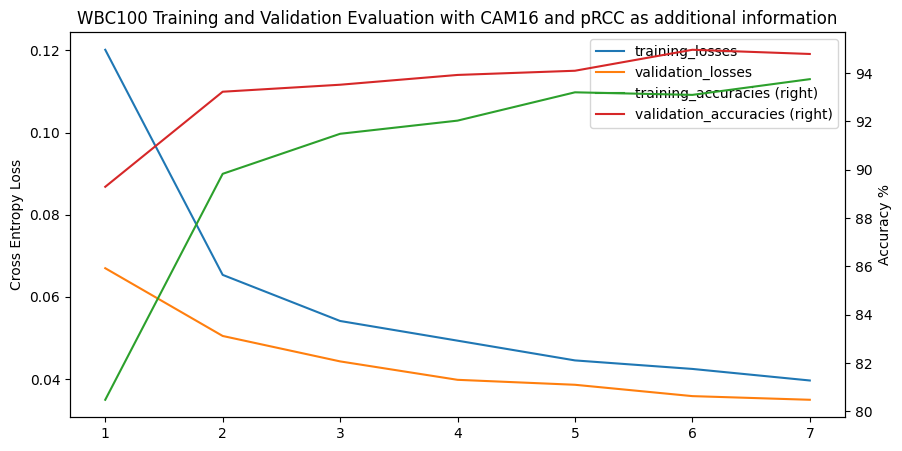

In [44]:
#### Plot training loss and accuracies ####
wbc_100_combined_df = pd.DataFrame(wbc100_combined_output_dict)
wbc_100_combined_df.index += 1
fig, ax = plt.subplots(figsize=(10,5))
wbc_100_combined_df.plot(y=['training_losses','validation_losses'], ax=ax, ylabel = 'Cross Entropy Loss')
wbc_100_combined_df.plot(y=['training_accuracies','validation_accuracies'], ax=ax, secondary_y=True, ylabel='Accuracy %')
plt.title('WBC100 Training and Validation Evaluation with CAM16 and pRCC as additional information')
plt.show()